سیگنال x(t) = e^(−t²) را در نظر بگیرید.  
۱. تبدیل فوریه این سیگنال را به‌صورت عددی رسم کنید.  
۲. حال سیگنال x(2t) را جایگزین کنید و تبدیل فوریه آن را نیز رسم کنید.  
۳. توضیح دهید کشش زمانی (time scaling) چه اثری روی طیف دارد.


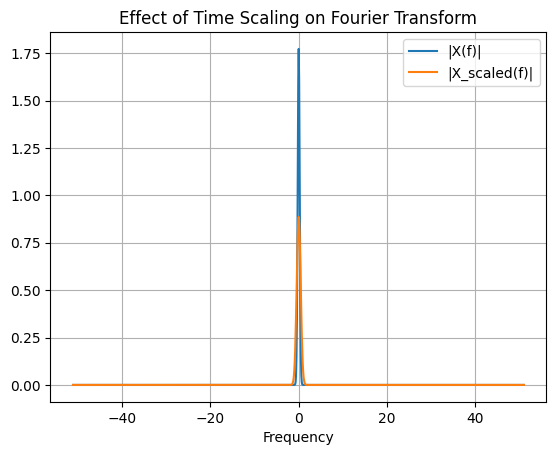

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft, fftfreq

t = np.linspace(-5, 5, 1024)
dt = t[1] - t[0]
x = np.exp(-t**2)
x_scaled = np.exp(-(2*t)**2)

f = fftshift(fftfreq(len(t), dt))
X = fftshift(fft(x)) * dt
X_scaled = fftshift(fft(x_scaled)) * dt

plt.plot(f, np.abs(X), label="|X(f)|")
plt.plot(f, np.abs(X_scaled), label="|X_scaled(f)|")
plt.legend()
plt.title("Effect of Time Scaling on Fourier Transform")
plt.xlabel("Frequency")
plt.grid(True)
plt.show()


سیگنال x(t) = rect(t) را در نظر بگیرید (تابع مستطیلی بین −0.5 تا 0.5).  
۱. طیف فوریه آن را محاسبه و رسم کنید.  
۲. حال سیگنال x(t−2) را بررسی کرده و طیف آن را نیز رسم کنید.  
۳. تفاوت فازی بین دو طیف را شرح دهید.


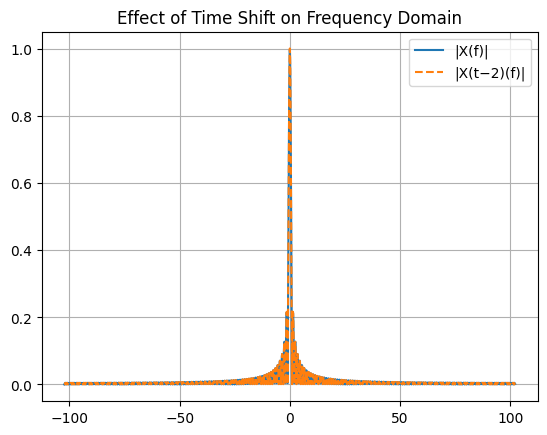

In [2]:
from scipy.fft import fft, fftshift, fftfreq

t = np.linspace(-5, 5, 2048)
dt = t[1] - t[0]
x = np.where(np.abs(t) <= 0.5, 1, 0)
x_shifted = np.where(np.abs(t - 2) <= 0.5, 1, 0)

f = fftshift(fftfreq(len(t), dt))
X = fftshift(fft(x)) * dt
X_shifted = fftshift(fft(x_shifted)) * dt

plt.plot(f, np.abs(X), label="|X(f)|")
plt.plot(f, np.abs(X_shifted), '--', label="|X(t−2)(f)|")
plt.title("Effect of Time Shift on Frequency Domain")
plt.legend()
plt.grid(True)
plt.show()


سیگنال ترکیبی x(t) = sin(10t) + 0.5*sin(50t) + 0.2*sin(100t) را در نظر بگیرید.  
۱. نمودار سیگنال را رسم کنید.  
۲. طیف فرکانسی آن را محاسبه کرده و فرکانس غالب (dominant frequency) را مشخص کنید.


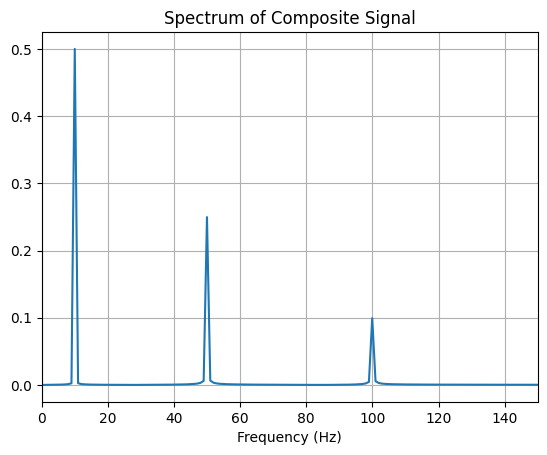

In [3]:
t = np.linspace(0, 1, 2000)
dt = t[1] - t[0]
x = np.sin(10 * 2 * np.pi * t) + 0.5 * np.sin(50 * 2 * np.pi * t) + 0.2 * np.sin(100 * 2 * np.pi * t)

f = fftshift(fftfreq(len(t), dt))
X = fftshift(fft(x)) * dt

plt.plot(f, np.abs(X))
plt.title("Spectrum of Composite Signal")
plt.xlabel("Frequency (Hz)")
plt.grid(True)
plt.xlim(0, 150)
plt.show()


یک سیگنال پالس مستطیلی با x(t) = u(t) − u(t−1) در نظر بگیرید.  
۱. سیگنال اصلی و نسخه تأخیر یافته‌ی x(t−1) را رسم کنید.  
۲. اثر این تأخیر را در دامنه فرکانسی نیز بررسی کرده و تفاوت طیف‌ها را مقایسه کنید.


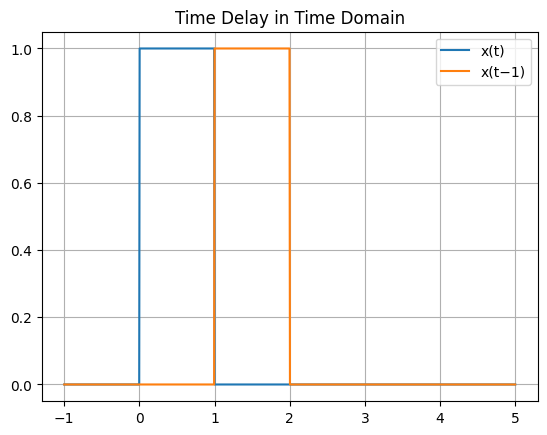

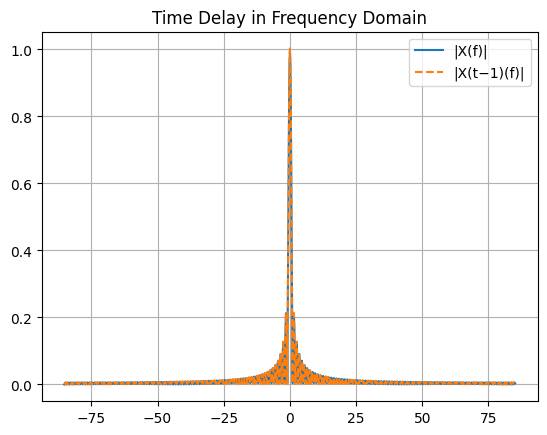

In [4]:
t = np.linspace(-1, 5, 1024)
dt = t[1] - t[0]
x = np.where((t >= 0) & (t < 1), 1, 0)
x_delayed = np.where((t >= 1) & (t < 2), 1, 0)

f = fftshift(fftfreq(len(t), dt))
X = fftshift(fft(x)) * dt
X_delayed = fftshift(fft(x_delayed)) * dt

plt.plot(t, x, label="x(t)")
plt.plot(t, x_delayed, label="x(t−1)")
plt.title("Time Delay in Time Domain")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(f, np.abs(X), label="|X(f)|")
plt.plot(f, np.abs(X_delayed), '--', label="|X(t−1)(f)|")
plt.title("Time Delay in Frequency Domain")
plt.legend()
plt.grid(True)
plt.show()


برای سیگنال x(t) = sin(t)/t، مشخص کنید که آیا دارای انرژی محدود است یا توان محدود.  
با محاسبه انرژی و میانگین توان در بازه t ∈ [−100, 100] به نتیجه برسید.


In [5]:
t = np.linspace(-100, 100, 10000)
x = np.sinc(t / np.pi)  # sin(t)/t

energy = np.trapezoid(x**2, t)
power = energy / (t[-1] - t[0])

print(f"Energy over [-100, 100]: {energy:.4f}")
print(f"Average Power: {power:.4f}")


Energy over [-100, 100]: 3.1316
Average Power: 0.0157
